### Loading the Dataset

In [1]:
import pandas as pd
df = pd.read_csv("data/Sample - Superstore.csv", encoding='latin1')

In [2]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Exploratory Data Analysis 

In [3]:
# shape of the dataset
df.shape

(9994, 21)

In [4]:
# data types
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [5]:
# missing values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
# basic stats 
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
# converting date columns data type to datetime64
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [9]:
# confirming the data tyoes
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

### **POSITIVE FACTORS ANALYSIS**

### Top-Seling Products

In [10]:
# Aggregate sales by product
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Selling Products:\n", top_products)

Top 10 Selling Products:
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


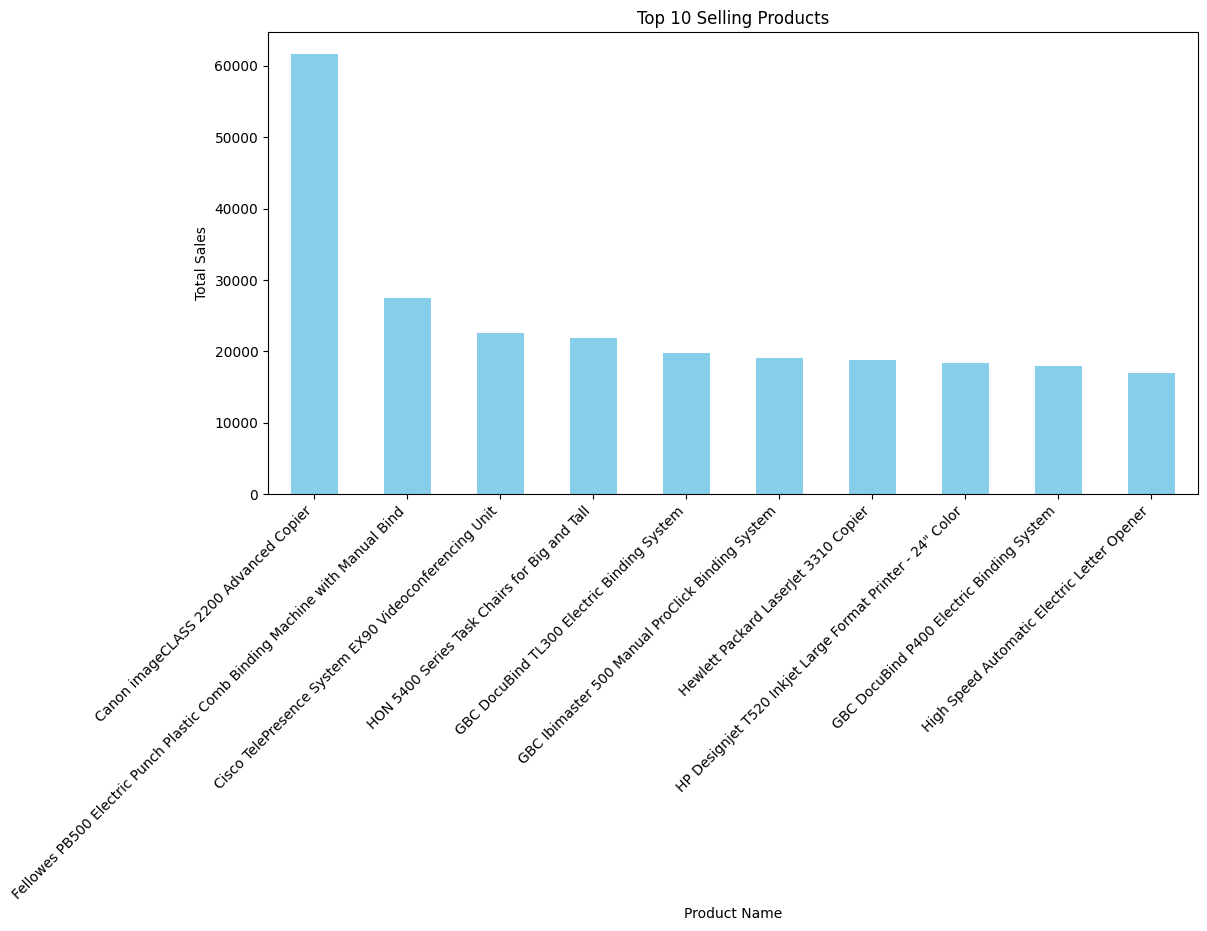

In [11]:
import matplotlib.pyplot as plt

top_products.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title("Top 10 Selling Products")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.show()

### Most Profitable Products

In [12]:
# Aggregate profit by product
top_profit_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
print("Top 10 Most Profitable Products:\n", top_profit_products)

Top 10 Most Profitable Products:
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: Profit, dtype: float64


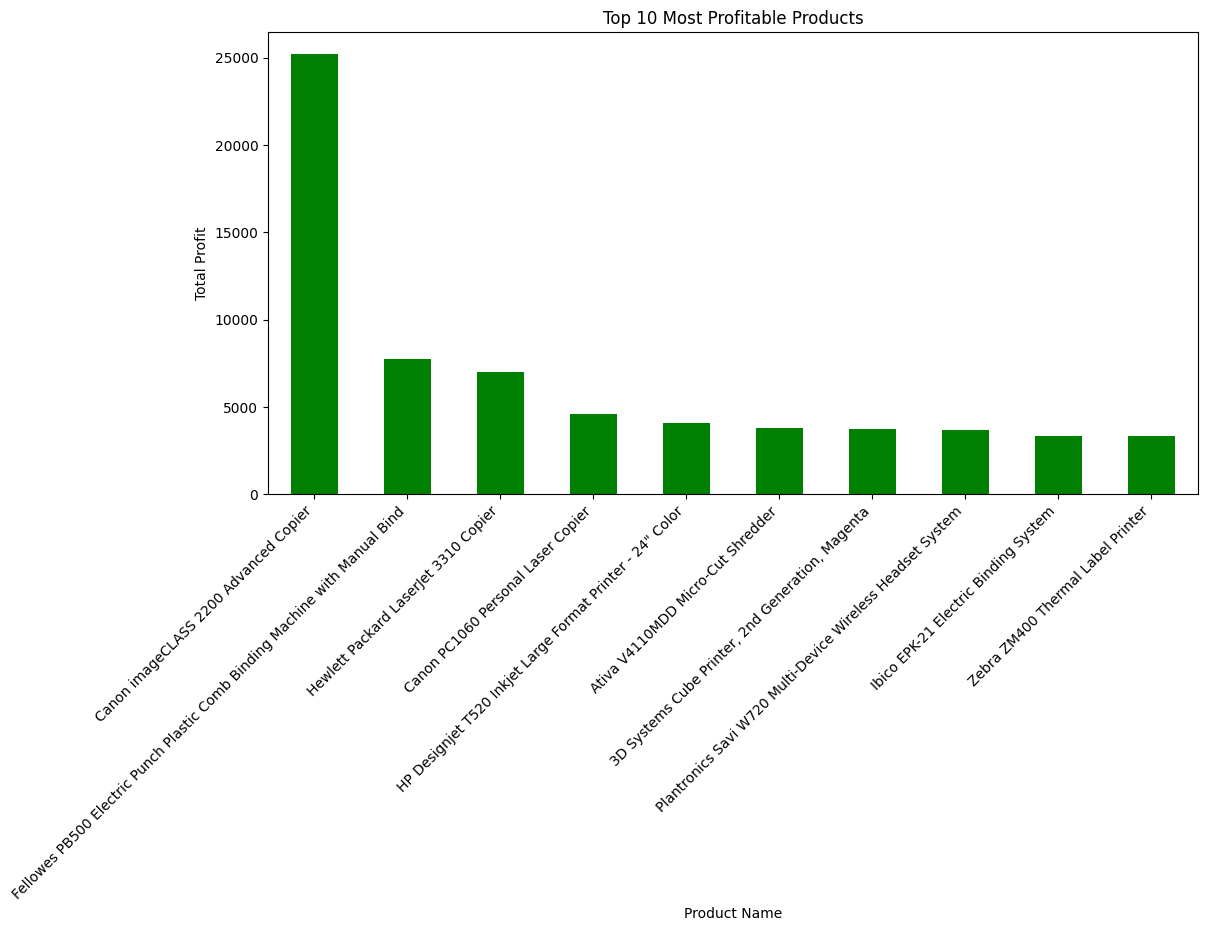

In [13]:
top_profit_products.plot(kind='bar', figsize=(12,6), color='green')
plt.title("Top 10 Most Profitable Products")
plt.ylabel("Total Profit")
plt.xticks(rotation=45, ha='right')
plt.show()

### Top Regions / States / Cities

In [14]:
# By Region
top_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("Sales by Region:\n", top_region)

# By State
top_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 States by Sales:\n", top_state)

# By City
top_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Cities by Sales:\n", top_city)

Sales by Region:
 Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

Top 10 States by Sales:
 State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64

Top 10 Cities by Sales:
 City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Sales, dtype: float64


### Top Categories / Sub-Categories

In [15]:
# Categories
top_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Sales by Category:\n", top_category)

# Sub-Categories
top_subcat = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Sub-Categories by Sales:\n", top_subcat)

Sales by Category:
 Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

Top 10 Sub-Categories by Sales:
 Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Name: Sales, dtype: float64


### Top 10 Customers

In [16]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Sales:\n", top_customers)

Top 10 Customers by Sales:
 Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


### High Value, Low Volume Products

In [17]:
# High sales but low quantity
high_value_low_volume = df.groupby('Product Name').agg({'Sales':'sum', 'Quantity':'sum'})
high_value_low_volume = high_value_low_volume.sort_values(by=['Sales','Quantity'], ascending=[False, True]).head(10)
print("High Value, Low Volume Products:\n", high_value_low_volume)

High Value, Low Volume Products:
                                                         Sales  Quantity
Product Name                                                           
Canon imageCLASS 2200 Advanced Copier               61599.824        20
Fellowes PB500 Electric Punch Plastic Comb Bind...  27453.384        31
Cisco TelePresence System EX90 Videoconferencin...  22638.480         6
HON 5400 Series Task Chairs for Big and Tall        21870.576        39
GBC DocuBind TL300 Electric Binding System          19823.479        37
GBC Ibimaster 500 Manual ProClick Binding System    19024.500        48
Hewlett Packard LaserJet 3310 Copier                18839.686        38
HP Designjet T520 Inkjet Large Format Printer -...  18374.895        12
GBC DocuBind P400 Electric Binding System           17965.068        27
High Speed Automatic Electric Letter Opener         17030.312        11


### Most Used Ship Mode

In [18]:
ship_mode_counts = df['Ship Mode'].value_counts()
print("Ship Mode Usage:\n", ship_mode_counts)

Ship Mode Usage:
 Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64


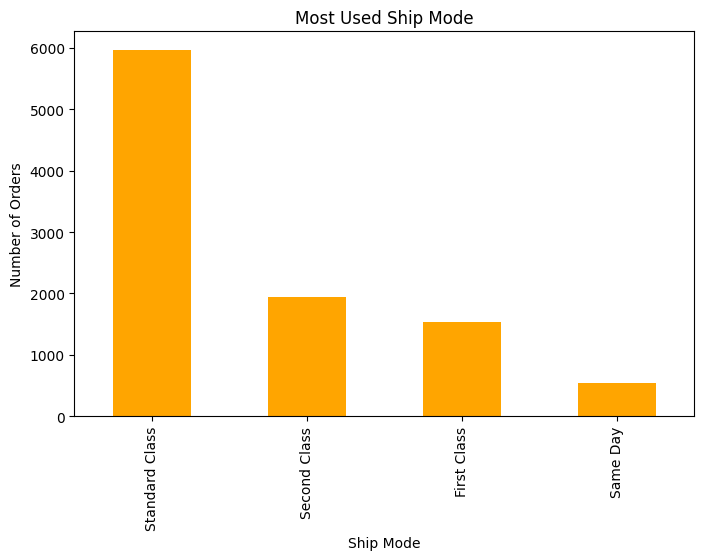

In [19]:
ship_mode_counts.plot(kind='bar', figsize=(8,5), color='orange')
plt.title("Most Used Ship Mode")
plt.ylabel("Number of Orders")
plt.show()

### Rolling 3 Month Revenue 

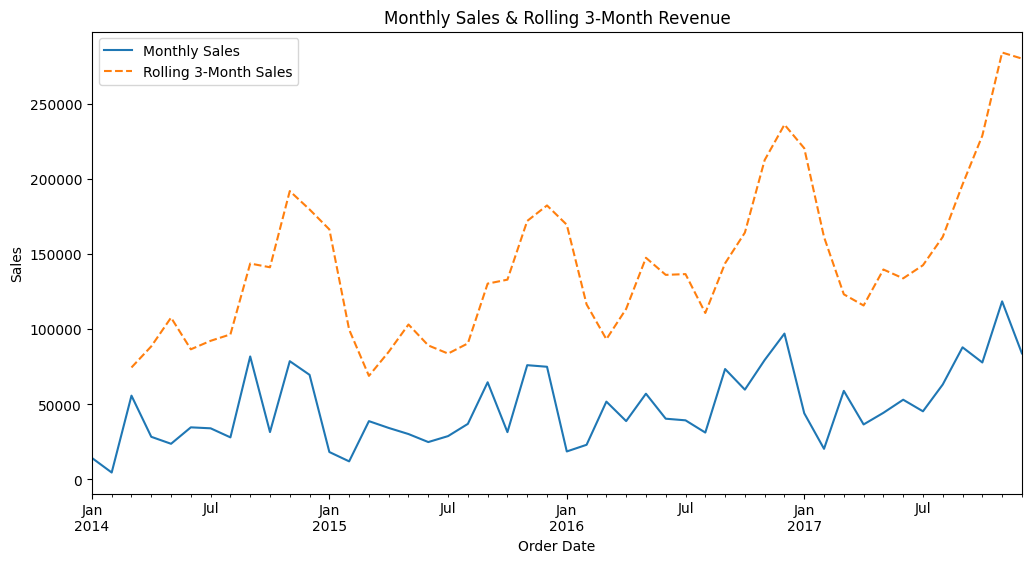

In [20]:
import warnings
warnings.filterwarnings("ignore")

# Aggregate monthly sales
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

# Rolling 3-month sum
rolling_3m = monthly_sales.rolling(3).sum()

# Plot
plt.figure(figsize=(12,6))
monthly_sales.plot(label='Monthly Sales')
rolling_3m.plot(label='Rolling 3-Month Sales', linestyle='--')
plt.title("Monthly Sales & Rolling 3-Month Revenue")
plt.ylabel("Sales")
plt.legend()
plt.show()

### Top Sales Months & Seasonal Trends

Sales by Month:
 Month
1      94924.8356
2      59751.2514
3     205005.4888
4     137762.1286
5     155028.8117
6     152718.6793
7     147238.0970
8     159044.0630
9     307649.9457
10    200322.9847
11    352461.0710
12    325293.5035
Name: Sales, dtype: float64


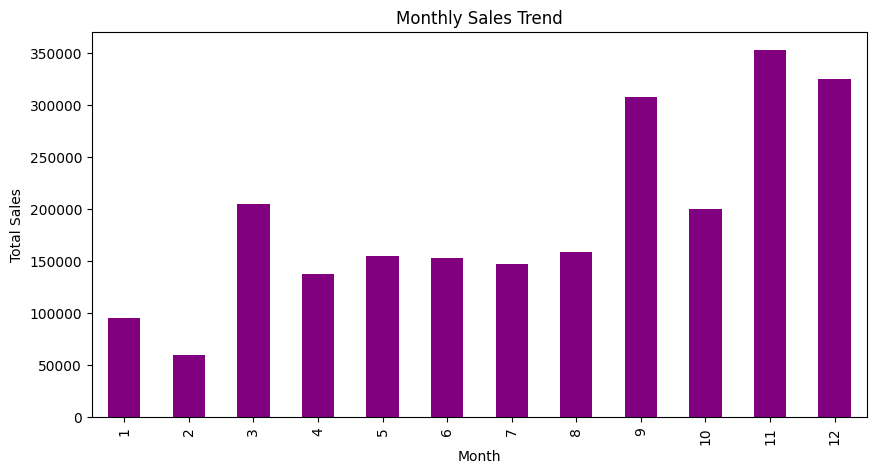

In [21]:
# Extract month
df['Month'] = df['Order Date'].dt.month

# Monthly sales aggregation
monthly_total = df.groupby('Month')['Sales'].sum()
print("Sales by Month:\n", monthly_total)

# Plot seasonal trend
monthly_total.plot(kind='bar', figsize=(10,5), color='purple')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

### Sales VS Profit Correlation 

In [22]:
correlation = df['Sales'].corr(df['Profit'])
print("Correlation between Sales and Profit:", correlation)

Correlation between Sales and Profit: 0.4790643497377061


### **NEGATIVE FACTORS ANALYSIS**

In [23]:
# Aggregate profit by product
loss_products = df.groupby('Product Name')['Profit'].sum()
loss_products = loss_products[loss_products < 0].sort_values()
print("Loss-Making Products:\n", loss_products)

Loss-Making Products:
 Product Name
Cubify CubeX 3D Printer Double Head Print                               -8.879970e+03
Lexmark MX611dhe Monochrome Laser Printer                               -4.589973e+03
Cubify CubeX 3D Printer Triple Head Print                               -3.839990e+03
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases                -2.876116e+03
Bush Advantage Collection Racetrack Conference Table                    -1.934398e+03
                                                                             ...     
Brites Rubber Bands, 1 1/2 oz. Box                                      -5.148000e-01
Rubber Band Ball                                                        -2.992000e-01
Acco PRESSTEX Data Binder with Storage Hooks, Dark Blue, 9 1/2" X 11"   -1.614000e-01
Premier Electric Letter Opener                                          -7.105427e-15
Global Super Steno Chair                                                -1.776357e-15
Name: Profit, Leng

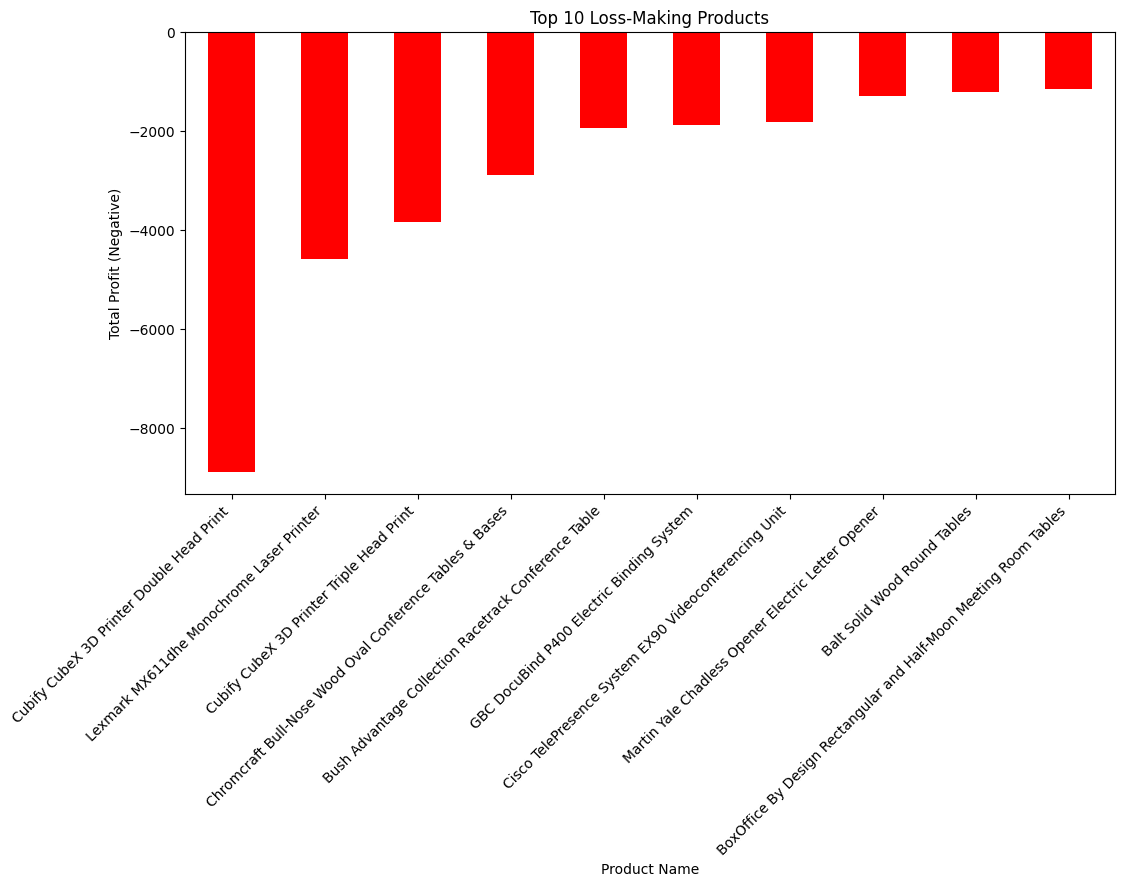

In [24]:
loss_products.head(10).plot(kind='bar', figsize=(12,6), color='red')
plt.title("Top 10 Loss-Making Products")
plt.ylabel("Total Profit (Negative)")
plt.xticks(rotation=45, ha='right')
plt.show()

### Lowest-Performing Regions / States / Cities

In [25]:
# Region
loss_region = df.groupby('Region')['Profit'].sum().sort_values()
print("Profit by Region:\n", loss_region)

# State
loss_state = df.groupby('State')['Profit'].sum().sort_values().head(10)
print("\nBottom 10 States by Profit:\n", loss_state)

# City
loss_city = df.groupby('City')['Profit'].sum().sort_values().head(10)
print("\nBottom 10 Cities by Profit:\n", loss_city)

Profit by Region:
 Region
Central     39706.3625
South       46749.4303
East        91522.7800
West       108418.4489
Name: Profit, dtype: float64

Bottom 10 States by Profit:
 State
Texas            -25729.3563
Ohio             -16971.3766
Pennsylvania     -15559.9603
Illinois         -12607.8870
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1190.4705
Name: Profit, dtype: float64

Bottom 10 Cities by Profit:
 City
Philadelphia   -13837.7674
Houston        -10153.5485
San Antonio     -7299.0502
Lancaster       -7239.0684
Chicago         -6654.5688
Burlington      -3622.8772
Dallas          -2846.5257
Phoenix         -2790.8832
Aurora          -2691.7386
Jacksonville    -2323.8350
Name: Profit, dtype: float64


### Low-Sales Months

Lowest Sales Months:
 Order Date
2     59751.2514
1     94924.8356
4    137762.1286
Name: Sales, dtype: float64


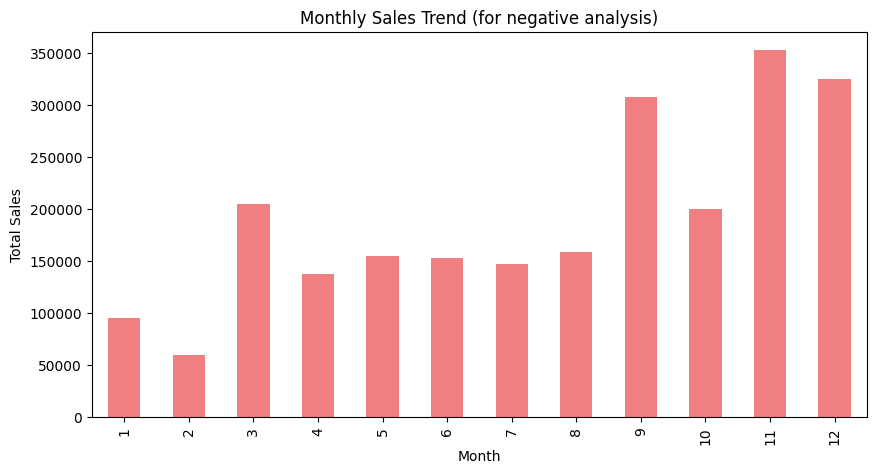

In [26]:
# Monthly sales aggregation
monthly_total = df.groupby(df['Order Date'].dt.month)['Sales'].sum()

# Find lowest sales months
low_sales_months = monthly_total.sort_values().head(3)
print("Lowest Sales Months:\n", low_sales_months)

# Plot
monthly_total.plot(kind='bar', figsize=(10,5), color='lightcoral')
plt.title("Monthly Sales Trend (for negative analysis)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

### Low-Profit Categories / Sub-Categories

In [27]:
# Category
low_profit_category = df.groupby('Category')['Profit'].sum().sort_values()
print("Profit by Category:\n", low_profit_category)

# Sub-Category
low_profit_subcat = df.groupby('Sub-Category')['Profit'].sum().sort_values().head(10)
print("\nBottom 10 Sub-Categories by Profit:\n", low_profit_subcat)

Profit by Category:
 Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

Bottom 10 Sub-Categories by Profit:
 Sub-Category
Tables        -17725.4811
Bookcases      -3472.5560
Supplies       -1189.0995
Fasteners        949.5182
Machines        3384.7569
Labels          5546.2540
Art             6527.7870
Envelopes       6964.1767
Furnishings    13059.1436
Appliances     18138.0054
Name: Profit, dtype: float64


### Low-Volume, Low-Value Products

In [28]:
low_value_low_volume = df.groupby('Product Name').agg({'Sales':'sum', 'Quantity':'sum'})
low_value_low_volume = low_value_low_volume.sort_values(by=['Sales','Quantity'], ascending=[True, True]).head(10)
print("Low-Volume, Low-Value Products:\n", low_value_low_volume)

Low-Volume, Low-Value Products:
                                                     Sales  Quantity
Product Name                                                       
Eureka Disposable Bags for Sanitaire Vibra Groo...  1.624         2
Avery 5                                             5.760         2
Xerox 20                                            6.480         1
Grip Seal Envelopes                                 7.072         2
Avery Hi-Liter Pen Style Six-Color Fluorescent Set  7.700         2
Avery Hi-Liter Comfort Grip Fluorescent Highlig...  7.800         4
Xerox 1989                                          7.968         2
4009 Highlighters                                   8.040         6
Stockwell Gold Paper Clips                          8.096         5
Newell 308                                          8.400         5


### Shipment Issues / Low-Profit Ship Modes

Profit by Ship Mode:
 Ship Mode
Same Day           15891.7589
First Class        48969.8399
Second Class       57446.6354
Standard Class    164088.7875
Name: Profit, dtype: float64


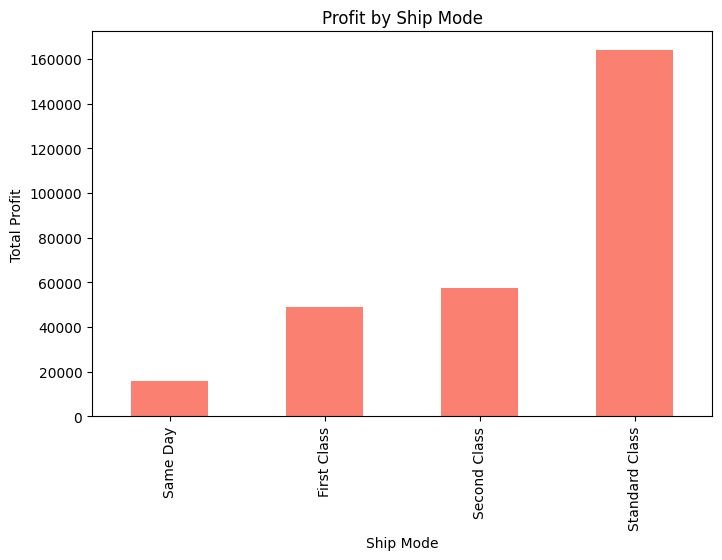

In [29]:
# Profit per Ship Mode
ship_mode_profit = df.groupby('Ship Mode')['Profit'].sum().sort_values()
print("Profit by Ship Mode:\n", ship_mode_profit)

# Optional: visualize
ship_mode_profit.plot(kind='bar', figsize=(8,5), color='salmon')
plt.title("Profit by Ship Mode")
plt.ylabel("Total Profit")
plt.show()

### Churned Customers (Optional / Advanced)

In [30]:
# Count orders per customer
customer_orders = df.groupby('Customer ID').agg({'Order ID':'nunique', 'Order Date':'max'})
# Find customers who haven't bought in last 12+ months of dataset
import datetime
last_date = df['Order Date'].max()
churned_customers = customer_orders[customer_orders['Order Date'] < (last_date - pd.DateOffset(months=12))]
print("Churned Customers:\n", churned_customers.head(10))

Churned Customers:
              Order ID Order Date
Customer ID                     
AB-10015            3 2016-11-10
AF-10885            4 2016-11-10
AG-10525            4 2015-09-07
AH-10690           12 2016-11-15
AO-10810            1 2016-08-16
AR-10570            1 2016-07-14
BS-11365            5 2016-06-20
BS-11665            3 2016-05-27
BT-11440            4 2016-06-18
BT-11485            2 2016-03-11


In [34]:
# Time intelligence columns
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month Name'] = df['Order Date'].dt.strftime('%b')
df['Year-Month'] = df['Order Date'].dt.to_period('M').astype(str)

# Profit margin
df['Profit Margin'] = df['Profit'] / df['Sales']

In [41]:
pip install XlsxWriter

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\Hp\hafsa-projects\venv\Scripts\python.exe -m pip install --upgrade pip


In [43]:
df.to_excel("Superstore_Cleaned.xlsx", index=False, engine="xlsxwriter")